In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Cargar el dataset
wine_data = pd.read_csv('E:/Bootcamp/wine/wine/winequality-red.csv')

# Ver las primeras filas del dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# Separar las características del dataset (sin la columna "quality")
X = wine_data.drop("quality", axis=1)

# Normalizar las variables usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar las dimensiones y una muestra de los datos normalizados
print(X_scaled[:5])


[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611]]


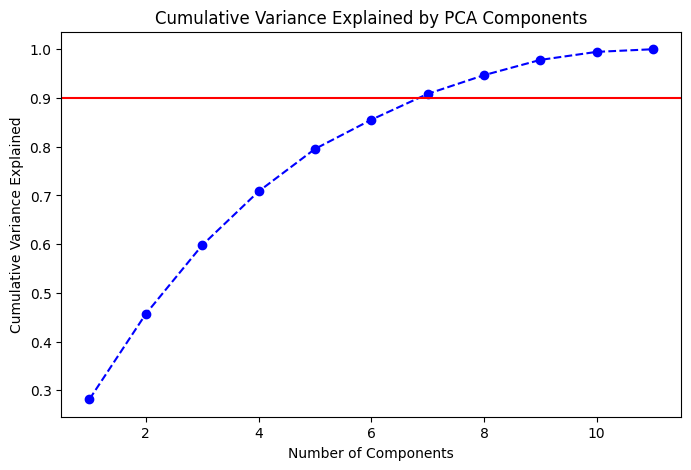

Componentes necesarios para explicar al menos el 90% de la varianza: 7


In [4]:
# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Visualizar la varianza explicada por cada componente
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.show()

# Mostrar la cantidad de componentes necesarios para explicar al menos el 90% de la variabilidad
num_components_90_variance = next(i for i, total in enumerate(cumulative_variance) if total >= 0.90) + 1
print(f"Componentes necesarios para explicar al menos el 90% de la varianza: {num_components_90_variance}")


In [5]:
# Obtener los coeficientes de los componentes principales (cargas de las variables en cada componente)
pca_components = pd.DataFrame(pca.components_, columns=X.columns)

# Mostrar los primeros 7 componentes principales para ver qué variables influyen más
print(pca_components.iloc[:7])


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.489314         -0.238584     0.463632        0.146107   0.212247   
1      -0.110503          0.274930    -0.151791        0.272080   0.148052   
2      -0.123302         -0.449963     0.238247        0.101283  -0.092614   
3      -0.229617          0.078960    -0.079418       -0.372793   0.666195   
4      -0.082614          0.218735    -0.058573        0.732144   0.246501   
5      -0.101479         -0.411449    -0.069593       -0.049156  -0.304339   
6       0.350227          0.533735    -0.105497       -0.290663  -0.370413   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.036158              0.023575  0.395353 -0.438520   0.242921   
1             0.513567              0.569487  0.233575  0.006711  -0.037554   
2             0.428793              0.322415 -0.338871  0.057697   0.279786   
3            -0.043538             -0.034577 -0.174500 -0.0

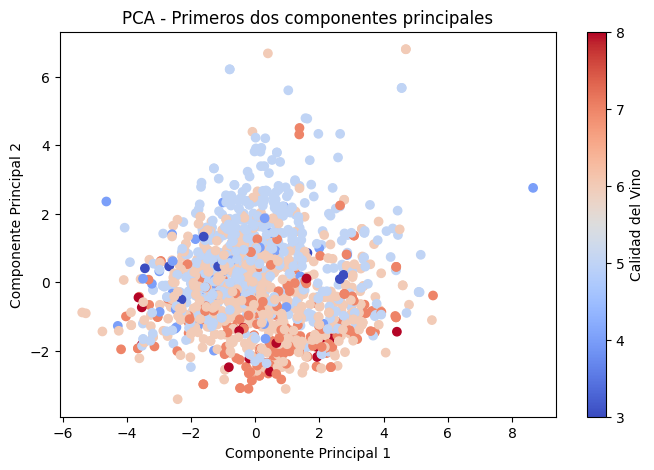

In [6]:
# Proyectar los datos en los primeros dos componentes principales
X_pca = pca.transform(X_scaled)

# Crear un gráfico de dispersión de los primeros dos componentes principales
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine_data['quality'], cmap='coolwarm')
plt.title('PCA - Primeros dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Calidad del Vino')
plt.show()
